In [1]:
import graphlab

In [2]:
dataset = graphlab.SFrame('home_data.gl/')
#SFrame is a data structure for representing tabular data

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1488302407.log


This non-commercial license of GraphLab Create for academic use is assigned to mohammed303760@science.tanta.edu.eg and will expire on February 03, 2018.


In [3]:
dataset

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [4]:
dataset.show()
#graphlab canvas is used for visualization of data

Canvas is accessible via web browser at the URL: http://localhost:55666/index.html
Opening Canvas in default web browser.


In [5]:
dataset.show(view='Scatter Plot', x='sqft_living', y='price')

Canvas is accessible via web browser at the URL: http://localhost:55666/index.html
Opening Canvas in default web browser.


In [6]:
#graphlab.canvas.set_target('ipynb')

In [7]:
training_set, test_set = dataset.random_split(.8, seed=0)

In [8]:
sqft_model = graphlab.linear_regression.create(training_set, target='price', features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16551

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.036958     | 4351575.215748     | 2282160.524310       | 261652.933141 | 287391.883076   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

In [9]:
sqft_model.evaluate(test_set)

SUCCESS: Optimal solution found.

{'max_error': 4145119.2081370642, 'rmse': 255183.30142100455}

In [10]:
print sqft_model.evaluate(test_set)

{'max_error': 4145119.2081370642, 'rmse': 255183.30142100455}


In [11]:
print dataset['price'].mean()

540088.141905


In [12]:
dataset['price'].show()

Canvas is accessible via web browser at the URL: http://localhost:55666/index.html
Opening Canvas in default web browser.


In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

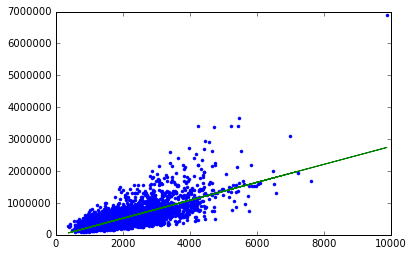

In [14]:
plt.plot(test_set['sqft_living'], test_set['price'], '.',
         test_set['sqft_living'], sqft_model.predict(test_set), '-')
#The model complexity is linear

In [15]:
sqft_model.show()

Canvas is updated and available in a tab in the default browser.


In [16]:
sqft_model.predict(test_set)

dtype: float
Rows: 4229
[356416.8216742031, 784651.4829847083, 435302.1540208751, 607159.4852046963, 260627.48953895853, 691679.4841475592, 1142452.8118428278, 587438.1521180283, 308522.1556065808, 728304.8170227997, 457840.82040563854, 488831.48668468825, 511370.1530694517, 505735.4864732608, 525456.8195599288, 863536.8153313803, 773382.1497923266, 283166.15592372196, 748026.1501094677, 252175.4896446722, 671958.1510608911, 305704.8223084854, 533908.8194542151, 522639.48626183346, 708583.4839361317, 393042.1545494437, 1046663.4797075833, 269079.4894332448, 424032.8208284934, 500100.81987707, 209915.49017324077, 652236.8179742232, 640967.4847818414, 193011.4903846682, 446571.4872132568, 378955.4880589665, 438119.48731897055, 1012855.480130438, 981864.8138513884, 463475.4870018294, 545178.1526465969, 167655.49070180935, 432484.82072277967, 686044.8175513683, 195828.82368276364, 1032576.813217106, 939604.8143799569, 635332.8181856506, 562082.1524351694, 508552.8197713563, 528274.15285802

In [17]:
test_set

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0114101516,2014-05-28 00:00:00+00:00,310000,3,1,1430,19901,1.5,0
9297300055,2015-01-24 00:00:00+00:00,650000,4,3,2950,5000,2,0
1202000200,2014-11-03 00:00:00+00:00,233000,3,2,1710,4697,1.5,0
8562750320,2014-11-10 00:00:00+00:00,580500,3,2.5,2320,3980,2,0
7589200193,2014-11-10 00:00:00+00:00,535000,3,1,1090,3000,1.5,0
2078500320,2014-06-20 00:00:00+00:00,605000,4,2.5,2620,7553,2,0
7766200013,2014-08-11 00:00:00+00:00,775000,4,2.25,4220,24186,1,0
9478500640,2014-08-19 00:00:00+00:00,292500,4,2.5,2250,4495,2,0
9558200045,2014-08-28 00:00:00+00:00,289000,3,1.75,1260,8400,1,0
8820901275,2014-06-10 00:00:00+00:00,571000,4,2,2750,7807,1.5,0


In [18]:
house1 = dataset[dataset['id'] == '0114101516']

In [19]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 0114101516 | 2014-05-28 00:00:00+00:00 | 310000 |    3     |     1     |     1430    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  19901   |  1.5   |     0      |  0   |     4     |   7   |    1430    |       0       |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1927   |      0       |  98028  | 47.75584254 | -122.22874498 |     1780.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [20]:
sqft_model.predict(house1)

dtype: float
Rows: 1
[356416.8216742031]

In [21]:
house1['price']

dtype: int
Rows: 1
[310000]

In [22]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-46461.8399534,5017.38154554
sqft_living,None,281.73332981,2.20716774384


In [23]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
my_features_model = graphlab.linear_regression.create(training_set, target='price', features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16583

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.049488     | 3761995.731899     | 2825022.381501       | 181035.884717 | 206721.200054   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [24]:
dataset[my_features].show()

Canvas is updated and available in a tab in the default browser.


In [25]:
dataset[my_features]

bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
3,1,1180,5650,1,98178
3,2.25,2570,7242,2,98125
2,1,770,10000,1,98028
4,3,1960,5000,1,98136
3,2,1680,8080,1,98074
4,4.5,5420,101930,1,98053
3,2.25,1715,6819,2,98003
3,1.5,1060,9711,1,98198
3,1,1780,7470,1,98146
3,2.5,1890,6560,2,98038


In [26]:
sqft_model.evaluate(test_set)

{'max_error': 4145119.2081370642, 'rmse': 255183.30142100455}

In [27]:
my_features_model.evaluate(test_set)

{'max_error': 3462422.986604956, 'rmse': 179611.15130294082}

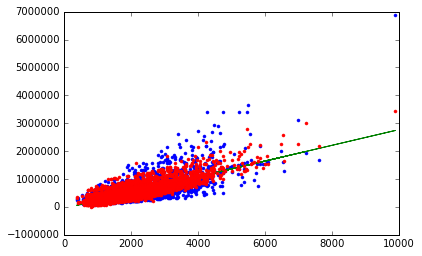

In [28]:
plt.plot(test_set['sqft_living'], test_set['price'], '.', 
         test_set['sqft_living'], sqft_model.predict(test_set), '-',
         test_set['sqft_living'], my_features_model.predict(test_set), '.')

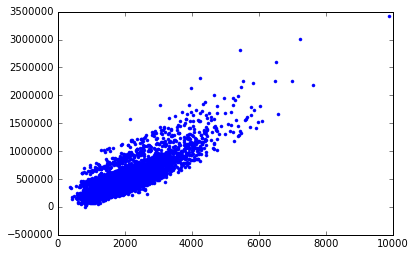

In [29]:
plt.plot(test_set['sqft_living'], my_features_model.predict(test_set), '.')

In [30]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 1

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 0114101516 | 2014-05-28 00:00:00+00:00 | 310000 |    3     |     1     |     1430    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  19901   |  1.5   |     0      |  0   |     4     |   7   |    1430    |       0       |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1927   |      0       |  98028  | 47.75584254 | -122.22874498 |     1780.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[1 rows x 21 columns]

In [31]:
print dataset['id' == '0114101516']['price']

221900


In [32]:
print my_features_model.predict(house1)[0]
print sqft_model.predict(house1)[0]

347767.665655
356416.821674


In [33]:
dataset.show(view='BoxWhisker Plot', x='zipcode', y='price')

Canvas is updated and available in a tab in the default browser.


In [34]:
dataset['price'].max()

7700000

In [35]:
house2 = dataset[dataset['price'] == 7700000]
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+
|     id     |            date           |  price  | bedrooms | bathrooms |
+------------+---------------------------+---------+----------+-----------+
| 6762700020 | 2014-10-13 00:00:00+00:00 | 7700000 |    6     |     8     |
+------------+---------------------------+---------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+------------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade | sqft_above |
+-------------+----------+--------+------------+------+-----------+-------+------------+
|    12050    |  27600   |  2.5   |     0      |  3   |     4     |   13  |    8570    |
+-------------+----------+--------+------------+------+-----------+-------+------------+
+---------------+----------+--------------+---------+-------------+
| sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+---------------+----------+--------------+---------+-------------+
|      3480     |   1910   |     1987     |  98102  | 47.62977314 |
+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.32270069 |     3940.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [36]:
print house2['price']
print sqft_model.predict(house2)
print my_features_model.predict(house2)

[7700000, ... ]
[3348424.7842515483]
[5117206.75119073]


In [37]:
dataset.head(1)

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 1

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 7129300520 | 2014-10-13 00:00:00+00:00 | 221900 |    3     |     1     |     1180    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5650   |   1    |     0      |  0   |     3     |   7   |    1180    |       0       |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1955   |      0       |  98178  | 47.51123398 | -122.25677536 |     1340.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[1 rows x 21 columns]

In [38]:
full_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
                 'long', 'sqft_living15', 'sqft_lot15']
full_featured_model = graphlab.linear_regression.create(training_set, target = 'price', features = full_features)
print full_featured_model.evaluate(test_set)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16567

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.079204     | 3466515.636961     | 1271472.740756       | 155408.324534 | 138012.260412   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

{'max_error': 3566309.4684091313, 'rmse': 157078.98161898775}


In [39]:
test_set

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0114101516,2014-05-28 00:00:00+00:00,310000,3,1,1430,19901,1.5,0
9297300055,2015-01-24 00:00:00+00:00,650000,4,3,2950,5000,2,0
1202000200,2014-11-03 00:00:00+00:00,233000,3,2,1710,4697,1.5,0
8562750320,2014-11-10 00:00:00+00:00,580500,3,2.5,2320,3980,2,0
7589200193,2014-11-10 00:00:00+00:00,535000,3,1,1090,3000,1.5,0
2078500320,2014-06-20 00:00:00+00:00,605000,4,2.5,2620,7553,2,0
7766200013,2014-08-11 00:00:00+00:00,775000,4,2.25,4220,24186,1,0
9478500640,2014-08-19 00:00:00+00:00,292500,4,2.5,2250,4495,2,0
9558200045,2014-08-28 00:00:00+00:00,289000,3,1.75,1260,8400,1,0
8820901275,2014-06-10 00:00:00+00:00,571000,4,2,2750,7807,1.5,0


In [40]:
test_house = test_set[test_set['id'] == '0114101516']

In [41]:
test_house

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 0114101516 | 2014-05-28 00:00:00+00:00 | 310000 |    3     |     1     |     1430    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  19901   |  1.5   |     0      |  0   |     4     |   7   |    1430    |       0       |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1927   |      0       |  98028  | 47.75584254 | -122.22874498 |     1780.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [42]:
print test_house['price'][0]

310000


In [43]:
print sqft_model.predict(test_house)[0]
print my_features_model.predict(test_house)[0]
print full_featured_model.predict(test_house)[0]

356416.821674
347767.665655
385737.194902


In [44]:
test_set['price'].max()

6885000

In [45]:
test_house2 = test_set[test_set['price'] == test_set['price'].max()]

In [46]:
test_house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 9208900037 | 2014-09-19 00:00:00+00:00 | 6885000 |    6     |    7.75   |     9890    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  31374   |   2    |     0      |  4   |     3     |   13  |    8860    |      1030     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   2001   |      0       |  98039  | 47.63046819 | -122.24043198 |     4540.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [47]:
print test_house2['price'][0]
print sqft_model.predict(test_house2)[0]
print my_features_model.predict(test_house2)[0]
print full_featured_model.predict(test_house2)[0]

6885000
2739880.79186
3422577.0134
3318690.53159


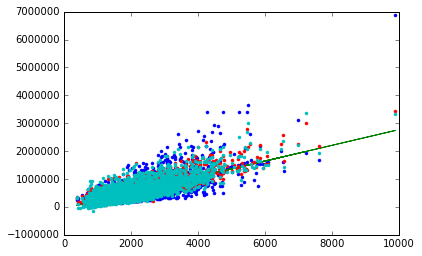

In [48]:
plt.plot(test_set['sqft_living'], test_set['price'], '.',
         test_set['sqft_living'], sqft_model.predict(test_set), '-',
         test_set['sqft_living'], my_features_model.predict(test_set), '.',
         test_set['sqft_living'], full_featured_model.predict(test_set), '.')

In [49]:
alansary_house = {'bedrooms':[8], 
                  'bathrooms':[25], 
                  'sqft_living':[50000], 
                  'sqft_lot':[225000],
                  'floors':[4], 
                  'zipcode':['98039'], 
                  'condition':[10], 
                  'grade':[10],
                  'waterfront':[1],
                  'view':[4],
                  'sqft_above':[37500],
                  'sqft_basement':[12500],
                  'yr_built':[1994],
                  'yr_renovated':[2010],
                  'lat':[47.627606],
                  'long':[-122.242054],
                  'sqft_living15':[5000],
                  'sqft_lot15':[40000]}

In [50]:
graphlab.SFrame(alansary_house)

Columns:
	bathrooms	int
	bedrooms	int
	condition	int
	floors	int
	grade	int
	lat	float
	long	float
	sqft_above	int
	sqft_basement	int
	sqft_living	int
	sqft_living15	int
	sqft_lot	int
	sqft_lot15	int
	view	int
	waterfront	int
	yr_built	int
	yr_renovated	int
	zipcode	str

Rows: 1

Data:
+-----------+----------+-----------+--------+-------+-----------+-------------+
| bathrooms | bedrooms | condition | floors | grade |    lat    |     long    |
+-----------+----------+-----------+--------+-------+-----------+-------------+
|     25    |    8     |     10    |   4    |   10  | 47.627606 | -122.242054 |
+-----------+----------+-----------+--------+-------+-----------+-------------+
+------------+---------------+-------------+---------------+----------+------------+
| sqft_above | sqft_basement | sqft_living | sqft_living15 | sqft_lot | sqft_lot15 |
+------------+---------------+-------------+---------------+----------+------------+
|   37500    |     12500     |    50000    |      5000     |  225000  |   40000    |
+------------+---------------+-------------+---------------+----------+------------+
+------+------------+----------+--------------+---------+
| view | waterfront | yr_built | yr_renovated | zipcode |
+------+------------+----------+--------------+---------+
|  4   |     1      |   1994   |     2010     |  98039  |
+------+------------+----------+--------------+---------+
[1 rows x 18 columns]

In [51]:
print sqft_model.predict(graphlab.SFrame(alansary_house))
print my_features_model.predict(graphlab.SFrame(alansary_house))
print full_featured_model.predict(graphlab.SFrame(alansary_house))

[14040204.650523702]
[13762599.811688539]
[10649493.97355862]


## Discovere which neighborhood (zip code) of Seattle had the highest average house sale price, take the sales data, select only the houses with this zip code, and compute the average price.

In [52]:
dataset.show(view='BoxWhisker Plot', x='zipcode', y='price')

Canvas is updated and available in a tab in the default browser.


In [53]:
zipcode_set = dataset[dataset['zipcode'] == '98039']

In [54]:
zipcode_set

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
3625049014,2014-08-29 00:00:00+00:00,2950000,4,3.5,4860,23885,2,0
2540700110,2015-02-12 00:00:00+00:00,1905000,4,3.5,4210,18564,2,0
3262300940,2014-11-07 00:00:00+00:00,875000,3,1,1220,8119,1,0
3262300940,2015-02-10 00:00:00+00:00,940000,3,1,1220,8119,1,0
6447300265,2014-10-14 00:00:00+00:00,4000000,4,5.5,7080,16573,2,0
2470100110,2014-08-04 00:00:00+00:00,5570000,5,5.75,9200,35069,2,0
2210500019,2015-03-24 00:00:00+00:00,937500,3,1,1320,8500,1,0
6447300345,2015-04-06 00:00:00+00:00,1160000,4,3,2680,15438,2,0
6447300225,2014-11-06 00:00:00+00:00,1880000,3,2.75,2620,17919,1,0
2525049148,2014-10-07 00:00:00+00:00,3418800,5,5,5450,20412,2,0


In [55]:
zipcode_set['price'].max()

6885000

In [56]:
zipcode_set['price'].mean()

2160606.5999999996

## Select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft. What fraction of the all houses have ‘sqft_living’ in this range?

In [57]:
selected_set = dataset[(dataset['sqft_living'] > 2000) & (dataset['sqft_living'] <= 4000)]

In [58]:
selected_set

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
1736800520,2015-04-03 00:00:00+00:00,662500,3,2.5,3560,9796,1,0
9297300055,2015-01-24 00:00:00+00:00,650000,4,3,2950,5000,2,0
2524049179,2014-08-26 00:00:00+00:00,2000000,3,2.75,3050,44867,1,0
7137970340,2014-07-03 00:00:00+00:00,285000,5,2.5,2270,6300,2,0
3814700200,2014-11-20 00:00:00+00:00,329000,3,2.25,2450,6500,2,0
1794500383,2014-06-26 00:00:00+00:00,937000,3,1.75,2450,2691,2,0
1873100390,2015-03-02 00:00:00+00:00,719000,4,2.5,2570,7173,2,0
8562750320,2014-11-10 00:00:00+00:00,580500,3,2.5,2320,3980,2,0
0461000390,2014-06-24 00:00:00+00:00,687500,4,1.75,2330,5000,1.5,0


In [59]:
selected_set.show()

Canvas is updated and available in a tab in the default browser.


In [60]:
dataset.show()

Canvas is updated and available in a tab in the default browser.


In [61]:
fraction = 9071 / 21509.0
print fraction

0.421730438421


## Build a regression model with several more features:
## advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', 'grade', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
## Compute the RMSE (root mean squared error) on the test_data for the model using just my_features, and for the one using advanced_features.
### Note 1: when doing the train-test split, make sure you use seed=0, so you get the same training and test sets, and thus results, as we do.
### Note 2: RMSE = sqrt(RSS/N)
* where N is the number of data points. RMSE can be more intuitive than RSS, since its units are the same as that of the target column in the data, in our case the unit is dollars ($), and doesn't grow with the number of data points, like the RSS does.

### (Important note: when answering the question below using GraphLab Create, when you call the linear_regression.create() function, make sure you use the parameter validation_set=None. When you use regression GraphLab Create, it sets aside a small random subset of the data to validate some parameters. This process can cause fluctuations in the final RMSE, so we will avoid it to make sure everyone gets the same answer.)
## What is the difference in RMSE between the model trained with my_features and the one trained with advanced_features?

In [62]:
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', 'grade',
                     'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
                     'sqft_living15', 'sqft_lot15']

In [63]:
training_set, test_set = dataset.random_split(.8, seed=0)
advanced_features_model = graphlab.linear_regression.create(training_set, target='price', features=advanced_features,
                                                            validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.074323     | 3469012.450686     | 154580.940736 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [64]:
print advanced_features_model.evaluate(test_set)

{'max_error': 3556849.413858208, 'rmse': 156831.1168021901}


In [65]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [66]:
my_features_model = graphlab.linear_regression.create(training_set, target='price', features=my_features,
                                                      validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.054613     | 3763208.270523     | 181908.848367 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [67]:
print my_features_model.evaluate(test_set)

{'max_error': 3486584.509381705, 'rmse': 179542.4333126903}


In [68]:
print advanced_features_model.evaluate(test_set)['rmse'], my_features_model.evaluate(test_set)['rmse']

156831.116802 179542.433313


In [69]:
difference = my_features_model.evaluate(test_set)['rmse'] - advanced_features_model.evaluate(test_set)['rmse']

In [70]:
print difference

22711.3165105
